In [161]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Create Dataset

In [162]:
df=pd.read_csv(r"C:\Users\speed\Documents\NLP Practice (TensorFlow)\IMDB Dataset.csv")
x=df["review"]
y=df["sentiment"]
train=[]
for i,j in zip(x,y):
    train.append([i,0 if j=="positive" else 1])
x=[]
y=[]
for i,j in train:
    x.append(i)
    y.append(j)
y=np.array(y)

# Initialize TensorBoard

In [163]:
tsb=tf.keras.callbacks.TensorBoard(log_dir="logs")

# Create Tokenizer Object

In [164]:
token=tf.keras.preprocessing.text.Tokenizer(oov_token="<OOV>")
token.fit_on_texts(x)
sequences=token.texts_to_sequences(x)
padded_sequences=tf.keras.preprocessing.sequence.pad_sequences(sequences,maxlen=50,padding="post",truncating="post")

# Create Model

In [165]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Embedding(len(token.word_index)+1,4,input_length=50),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# Compile The Model

In [166]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

# Train The Model

In [167]:
history=model.fit(padded_sequences,y,epochs=10,validation_split=0.3,callbacks=[tsb])

Epoch 1/10
1094/1094 [==============================] - 21s 18ms/step - loss: 0.5386 - accuracy: 0.7232 - val_loss: 0.4569 - val_accuracy: 0.7835
Epoch 2/10
1094/1094 [==============================] - 19s 18ms/step - loss: 0.3627 - accuracy: 0.8405 - val_loss: 0.4547 - val_accuracy: 0.7920
Epoch 3/10
1094/1094 [==============================] - 22s 20ms/step - loss: 0.2796 - accuracy: 0.8872 - val_loss: 0.4820 - val_accuracy: 0.7884
Epoch 4/10
1094/1094 [==============================] - 20s 18ms/step - loss: 0.2163 - accuracy: 0.9167 - val_loss: 0.5369 - val_accuracy: 0.7813
Epoch 5/10
1094/1094 [==============================] - 21s 19ms/step - loss: 0.1687 - accuracy: 0.9400 - val_loss: 0.6049 - val_accuracy: 0.7779
Epoch 6/10
1094/1094 [==============================] - 20s 19ms/step - loss: 0.1329 - accuracy: 0.9539 - val_loss: 0.6817 - val_accuracy: 0.7683
Epoch 7/10
1094/1094 [==============================] - 20s 19ms/step - loss: 0.1036 - accuracy: 0.9649 - val_loss: 0.7745 -

# Accuracy Graph

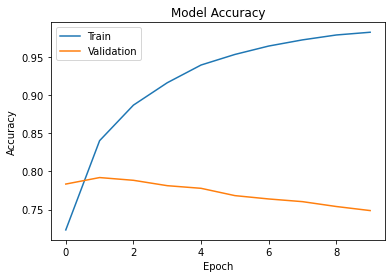

In [168]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train","Validation"],loc="best")

# Loss Graph

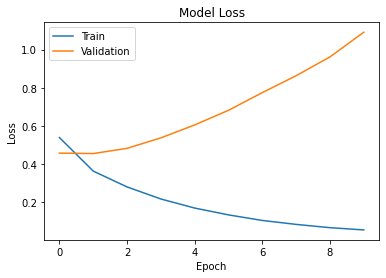

In [169]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train","Validation"],loc="best")

# Predict On Texts

In [170]:
test_x=["A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only 'has got all the polari' but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.","I bought this film at Blockbuster for $3.00, because it sounded interesting (a bit Ranma-esque, with the idea of someone dragging around a skeleton), because there was a cute girl in a mini-skirt on the back, and because there was a Restricted Viewing sticker on it. I thought it was going to be a sweet or at least sincere coming of age story with a weird indie edge. I was 100% wrong.<br /><br />Having watched it, I have to wonder how it got the restricted sticker, since there is hardly any foul language, little violence, and the closest thing to nudity (Honestly! I don't usually go around hoping for it!) is when the girl is in her nightgown and you see her panties (you see her panties a lot in this movie, because no matter what, she's wearing a miniskirt of some sort). Even the anti-religious humor is tame (and lame, caricatured, insincere, derivative, unoriginal, and worst of all not funny in the slightest--it would be better just to listen to Ray Stevens' 'Would Jesus Wear a Rolex on His Television Show'). This would barely qualify as PG-13 (it is Not Rated), but Blockbuster refuses to let anyone under the age of 17 rent this--as if it was pornographic. Any little kid could go in there and rent the edited version of Requiem for a Dream, but they insist that Zack and Reba is worse.<br /><br />It is, but not in that way.<br /><br />In a way, this worries me--the only thing left that could offend people is the idea of the suicide at the beginning. If anybody needs to see movies with honestly portrayed suicides (not this one, but better ones like The Virgin Suicides), it's teenagers. If both of those movies were rated R purely because of the suicide aspect, then I have little chance of turning a story I've been writing into a PG-13 movie (the main characters are eleven and a half and twelve). Suicide is one of the top three leading causes of death in teenagers (I think it's number 2), so chances are that most teens have been or will be affected by it.<br /><br />Just say no to this movie, though. 2/10."]

In [171]:
test_token=tf.keras.preprocessing.text.Tokenizer(oov_token="<OOV>")
test_token.fit_on_texts(test_x)
test_sequences=test_token.texts_to_sequences(test_x)
test_padded_sequences=tf.keras.preprocessing.sequence.pad_sequences(test_sequences,maxlen=50,padding="post",truncating="post")

In [172]:
np.round(model.predict(test_padded_sequences))

1/1 [==============================] - 0s 180ms/step


array([[0.],
       [1.]], dtype=float32)

# Save The Model

In [173]:
model.save("movie_reviews_classifier.h5")

# Convert To TFLite Model For Edge Devices

In [174]:
tf_lite_converter=tf.lite.TFLiteConverter.from_keras_model(model)
with open("movie_reviews_classifier.tflite","wb")as f:
    f.write(tf_lite_converter.convert())

INFO:tensorflow:Assets written to: C:\Users\speed\AppData\Local\Temp\tmp7sdyovra\assets


INFO:tensorflow:Assets written to: C:\Users\speed\AppData\Local\Temp\tmp7sdyovra\assets
